# Caso 3: Selecci√≥n y Programaci√≥n de Proyectos I

---
## Maestr√≠a en Inteligencia Anal√≠tica de Datos

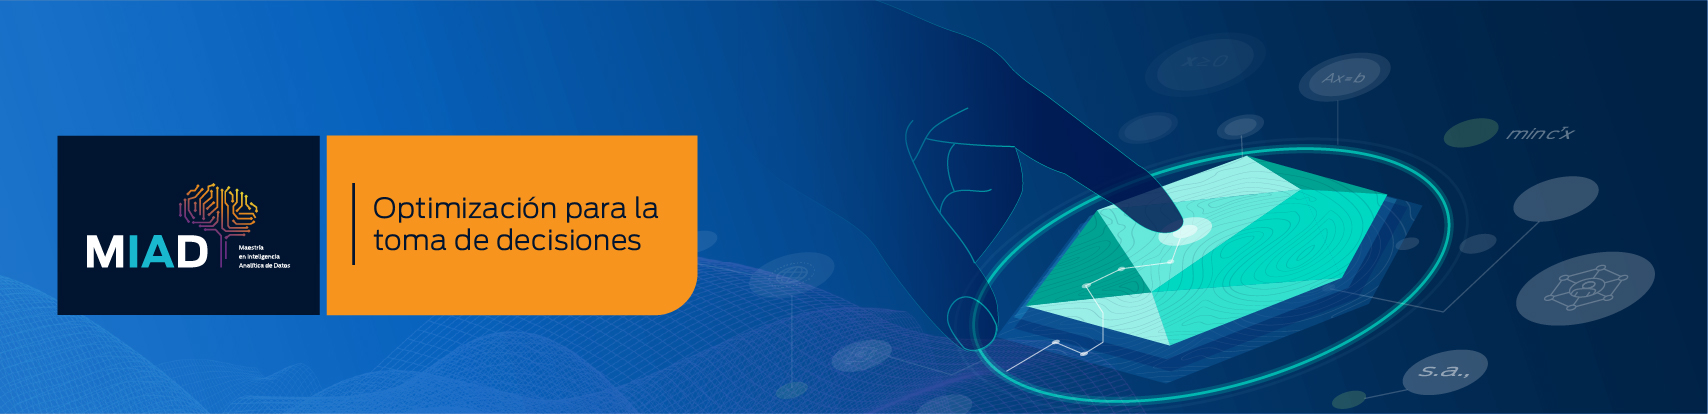


## Instrucciones generales

El primer paso antes de resolver este laboratorio es leer y entender el **enunciado del caso**. Una vez tengas claro el caso, te explicamos la estructura de este laboratorio (los dem√°s laboratorios siguen una estructura similar). 

Este laboratorio tiene las siguientes secciones: 
* **Formulaci√≥n**: un breve resumen del modelo con notaci√≥n matem√°tica y descripci√≥n de sus componentes
* **Importaci√≥n de librer√≠as**
* **Creaci√≥n de par√°metros**
* **Modelado**: aqu√≠ implementamos el modelo visto en la formulaci√≥n (aqu√≠ encontrar√°s por lo general celdas de c√≥digo que debes completar, ¬°nosotros te guiaremos en el proceso!)
* **Reporte de Resultados**: esta secci√≥n nos muestra las soluciones encontradas por el modelo y, en ocasiones, algunas visualizaciones interesantes para entenderlo mejor. (es posible que en ciertas pr√°cticas debas completar algunas celdas tambi√©n)

Este tipo de actividades se evaluar√° sobre un total de 100 puntos. Las celdas calificables se distinguen por tener la instrucci√≥n `# your code here`. Antes de estas celdas  encontrar√°s instrucciones y consejos para resolver las preguntas, tambi√©n el puntaje que le corresponde. **Ten en cuenta que si no sigues las instrucciones al pie de la letra, no obtendr√°s el puntaje. Por ejemplo, debes llamar a las variables en Python y nombrar los elementos de tu modelo exactamente c√≥mo lo indica el enunciado. De lo contrario, no obtendr√°s puntaje en ese inciso.** 

¬°√âxitos!

## Formulaci√≥n
---

Te presentamos la formulaci√≥n del caso de la semana de forma resumida. Te recomendamos revisar la formulaci√≥n una vez hayas le√≠do el enunciado del caso. Es bueno que te familiarices con los elementos de la formulaci√≥n antes de iniciar la implementaci√≥n.

### Conjuntos y Par√°metros
>#### **Conjuntos**
>* $P$: conjunto de pozos candidatos
>* $T$: conjunto de periodos (a√±os) en el horizonte de planeaci√≥n

>#### **Par√°metros**
>* $n$: m√°ximo n√∫mero de pozos a perforar en el horizonte de planeaci√≥n
>* $b$: presupuesto total de la compa√±√≠a para la realizaci√≥n de proyectos (en millones de USD)
>* $s$: n√∫mero de operarios disponibles por a√±o
>* $u$: n√∫mero de generadores disponibles por a√±o
>* $p_i$: promedio diario (miles de barriles) de crudo producidos en el pozo $i\in P$
>* $o_i$: operarios requeridos para perforar el pozo $i\in P$
>* $g_i$: generadores requeridos para perforar el pozo $i\in P$
>* $m_t$: meta de producci√≥n (miles de barriles) promedio diaria para el a√±o $t\in T$
>* $v_{it}$: utilidad esperada por perforar el pozo $i\in P$ en el a√±o $t\in T$ (en millones de USD)
>* $c_{it}$: costo por perforar el pozo $i\in P$ en el a√±o $t\in T$ (en millones de USD)


### Variables de Decisi√≥n
> $x_{it} = \begin{cases}1, & \text{si el pozo} \, i\in P \text{ se perfora en el a√±o} \, t\in T \\ 0, & \text{de lo contrario}\end{cases}$


### Restricciones
> 1. Un pozo se perfora m√°ximo una vez en el horizonte de planeaci√≥n
>> $\sum_{t\in T}x_{it} \, \leq \, 1, \; \forall i\in P$
> 2. La inversi√≥n total no puede superar el presupuesto
>>$\sum_{i\in P}\sum_{t\in T}c_{it}x_{it} \, \leq \, b$
> 3. Las metas de producci√≥n (en miles de barriles diarios) deben ser cumplidas
>>$\sum_{i\in P}p_i x_{it} \, \geq \, m_t \; \forall t\in T$
> 4. No se debe exceder la cantidad de operarios disponibles
>> *# Para desarrollo del estudiante*
> 5. No se debe exceder la cantidad de generadores disponibles
>> *# Para desarrollo del estudiante*
> 6. No se debe exceder la cantidad de pozos perforados impuesta por el gobierno
>> *# Para desarrollo del estudiante*

>
> **Naturaleza de las variables**
>> $x_{it} \in \{0,1\}, \; \forall i\in P, t\in T$

### Funci√≥n Objetivo
> Maximizar la utilidad total
>> $ \max \; \sum_{i\in P}\sum_{t\in T} v_{it}x_{it}$

## Importaci√≥n de librer√≠as
---

Antes de empezar, es necesario importar los paquetes que vamos a utilizar durante la pr√°ctica.
El paquete `pulp` permite crear modelos de optimizaci√≥n, crear variables, a√±adir restricciones y muchos m√°s. Le asignamos el alias de `lp`.
El paquete `pandas` es muy √∫til para el an√°lisis de datos en general. Le asignamos el alias de `pd`.
A lo largo del c√≥digo, puedes corroborar que se usan estos paquetes cuando veas un objeto o m√©todo que empiece con los alias `lp.` o `pd.`

In [12]:
import pulp as lp  
import pandas as pd

In [13]:
!pip show pulp

Name: PuLP
Version: 2.6.0
Summary: PuLP is an LP modeler written in python. PuLP can generate MPS or LP files and call GLPK, COIN CLP/CBC, CPLEX, and GUROBI to solve linear problems.
Home-page: https://github.com/coin-or/pulp
Author: J.S. Roy and S.A. Mitchell and F. Peschiera
Author-email: pulp@stuartmitchell.com
License: UNKNOWN
Location: /opt/conda/lib/python3.7/site-packages
Requires: 
Required-by: 


## Creaci√≥n de Par√°metros
---

### Conjuntos

Para empezar, es necesario crear los conjuntos que vimos en la formulaci√≥n. Esto nos permite indexar variables, crear sumatorias, m√∫ltiples restricciones y dem√°s. 

En Python, los conjuntos son sencillamente listas (`list`) que contienen los elementos de cada conjunto, como en el caso de los pozos `Pozos`. En ocasiones, cuando el conjunto contiene n√∫meros ordenados (como el conjunto de a√±os `Tiempos`), utilizamos la funci√≥n `range(desde, hasta)` que crea una secuencia de n√∫meros r√°pidamente. 

Tambi√©n es posible que alguna variable o par√°metro tengan m√∫ltiples √≠ndices. Para estos casos, creamos una lista de tuplas (e.g., `(i,t)`) que contengan todas las posibles combinaciones de √≠ndices de los dos conjuntos. La lista `Pozo_x_Tiempo` tiene esta caracter√≠stica.

In [14]:
# Conjunto de pozos
Pozos = [
    "DELE B-1",
    "EL MORRO-1",
    "FLORENA A-5",
    "FLORENA C-6",
    "FLORENA N-2",
    "FLORENA N-4 ST",
    "FLORENA-T8",
    "PAUTO J-6",
    "PAUTO M4",
    "PAUTO M-5",
    "PAUTO SUR B-1",
    "PAUTO SUR C-2",
    "PAUTO-1",
    "VOLCANERA A-1",
    "VOLCANERA C-2",
]

# Conjunto de a√±os
Tiempos = range(1, 11)

# Conjunto de tuplas (pozo, a√±o)
Pozo_x_Tiempo = [(i, t) for i in Pozos for t in Tiempos]


### Par√°metros

Ahora bien, ya que se tienen los conjuntos, debemos crear los par√°metros del problema. En ocasiones, algunos par√°metros estar√°n guardados en archivos de soporte (`.csv`, `.xlsx`, etc.), pero en nuestro caso los vamos a crear manualmente para comprender el proceso de creaci√≥n. 

Los par√°metros deben ser num√©ricos (`int` o `float`). Si el par√°metro no esta indexado en ning√∫n conjunto, como `presupuesto`, simplemente se asigna el valor al objeto de Python. Por otro lado, si est√° indexado en alg√∫n conjunto, es necesario crear un diccionario `dict` con los √≠ndices en las **llaves** y los n√∫meros en los **valores** del diccionario (ver `metas`). Para ser m√°s eficientes, podemos crear un solo diccionario para varios par√°metros que compartan los mismos √≠ndices, para esto, se colocan los √≠ndices en las **llaves** y los par√°metros como una lista en cada uno de los **valores** (ver `dataPozos`). Sin embargo, es necesario separar este diccionario al final usando la funci√≥n `lp.splitDict()` para usar cada par√°metro de forma independiente.

In [15]:
# Presupuesto m√°ximo
presupuesto = 100 
# M√°ximo n√∫mero de proyectos a realizar - restricci√≥n ambiental
maxProyectos = 12  
# N√∫mero de operarios por a√±o
maxOperarios = 4   
# N√∫mero de generadores por a√±o
maxGeneradores = 4 

# Par√°metros indexados en a√±os
# tiempo: meta (miles de barriles por d√≠a)
metas = {1: 3, 2: 4, 3: 5, 4: 4, 5: 5, 6: 3, 7: 5, 8: 4, 9: 4, 10: 6}

# Par√°metros indexados en los pozos (abajo se separan en diccionarios diferentes)
# pozo: prod.minima, prod.moda, prod.m√°xima, operarios, generadores
dataPozos = {
             'DELE B-1':       [1,3,4,3,3],
             'EL MORRO-1':     [3,4,6,2,3],
             'FLORENA A-5':    [3,6,7,4,2],
             'FLORENA C-6':    [1,3,6,4,3],
             'FLORENA N-2':    [4,6,10,3,2],
             'FLORENA N-4 ST': [1,4,6,4,3],
             'FLORENA-T8':     [2,4,8,2,2],
             'PAUTO J-6':      [2,3,5,3,2],
             'PAUTO M4':       [3,5,7,3,3],
             'PAUTO M-5':      [1,4,8,4,2],
             'PAUTO SUR B-1':  [4,5,7,2,4],
             'PAUTO SUR C-2':  [4,6,8,3,3],
             'PAUTO-1':        [3,5,8,3,2],
             'VOLCANERA A-1':  [4,5,9,2,3],
             'VOLCANERA C-2':  [2,5,7,2,2]
}

# Par√°metros indexados en los pozos y los a√±os (abajo se separan en diccionarios diferentes)
# (pozo, a√±o):   costo, utilidad  
dataPozoA√±o ={ 
                ('DELE B-1',1)       :[13,14],
                ('EL MORRO-1',1)     :[21,81],
                ('FLORENA A-5',1)    :[8,81],
                ('FLORENA C-6',1)    :[7,93],
                ('FLORENA N-2',1)    :[3,26],
                ('FLORENA N-4 ST',1) :[23,77],
                ('FLORENA-T8',1)     :[6,88],
                ('PAUTO J-6',1)      :[2,13],
                ('PAUTO M4',1)       :[9,57],
                ('PAUTO M-5',1)      :[12,34],
                ('PAUTO SUR B-1',1)  :[2,10],
                ('PAUTO SUR C-2',1)  :[21,20],
                ('PAUTO-1',1)        :[12,43],
                ('VOLCANERA A-1',1)  :[16,51],
                ('VOLCANERA C-2',1)  :[22,44],
                ('DELE B-1',2)       :[25,55],
                ('EL MORRO-1',2)     :[9,54],
                ('FLORENA A-5',2)    :[15,70],
                ('FLORENA C-6',2)    :[14,40],
                ('FLORENA N-2',2)    :[23,65],
                ('FLORENA N-4 ST',2) :[5,55],
                ('FLORENA-T8',2)     :[10,24],
                ('PAUTO J-6',2)      :[23,92],
                ('PAUTO M4',2)       :[10,58],
                ('PAUTO M-5',2)      :[3,26],
                ('PAUTO SUR B-1',2)  :[16,72],
                ('PAUTO SUR C-2',2)  :[11,39],
                ('PAUTO-1',2)        :[2,57],
                ('VOLCANERA A-1',2)  :[15,51],
                ('VOLCANERA C-2',2)  :[8,45],
                ('DELE B-1',3)       :[17,74],
                ('EL MORRO-1',3)     :[22,23],
                ('FLORENA A-5',3)    :[12,44],
                ('FLORENA C-6',3)    :[11,31],
                ('FLORENA N-2',3)    :[7,53],
                ('FLORENA N-4 ST',3) :[12,71],
                ('FLORENA-T8',3)     :[12,80],
                ('PAUTO J-6',3)      :[17,22],
                ('PAUTO M4',3)       :[14,59],
                ('PAUTO M-5',3)      :[15,34],
                ('PAUTO SUR B-1',3)  :[24,88],
                ('PAUTO SUR C-2',3)  :[25,61],
                ('PAUTO-1',3)        :[8,46],
                ('VOLCANERA A-1',3)  :[14,33],
                ('VOLCANERA C-2',3)  :[17,15],
                ('DELE B-1',4)       :[19,75],
                ('EL MORRO-1',4)     :[6,70],
                ('FLORENA A-5',4)    :[23,18],
                ('FLORENA C-6',4)    :[16,36],
                ('FLORENA N-2',4)    :[14,44],
                ('FLORENA N-4 ST',4) :[18,34],
                ('FLORENA-T8',4)     :[6,22],
                ('PAUTO J-6',4)      :[20,30],
                ('PAUTO M4',4)       :[5,93],
                ('PAUTO M-5',4)      :[7,68],
                ('PAUTO SUR B-1',4)  :[25,12],
                ('PAUTO SUR C-2',4)  :[13,75],
                ('PAUTO-1',4)        :[12,56],
                ('VOLCANERA A-1',4)  :[10,16],
                ('VOLCANERA C-2',4)  :[6,11],
                ('DELE B-1',5)       :[7,54],
                ('EL MORRO-1',5)     :[8,58],
                ('FLORENA A-5',5)    :[22,15],
                ('FLORENA C-6',5)    :[17,29],
                ('FLORENA N-2',5)    :[20,95],
                ('FLORENA N-4 ST',5) :[17,32],
                ('FLORENA-T8',5)     :[10,91],
                ('PAUTO J-6',5)      :[6,29],
                ('PAUTO M4',5)       :[6,72],
                ('PAUTO M-5',5)      :[25,91],
                ('PAUTO SUR B-1',5)  :[21,95],
                ('PAUTO SUR C-2',5)  :[15,63],
                ('PAUTO-1',5)        :[17,64],
                ('VOLCANERA A-1',5)  :[12,54],
                ('VOLCANERA C-2',5)  :[17,19],
                ('DELE B-1',6)       :[10,84],
                ('EL MORRO-1',6)     :[13,48],
                ('FLORENA A-5',6)    :[9,10],
                ('FLORENA C-6',6)    :[25,32],
                ('FLORENA N-2',6)    :[17,92],
                ('FLORENA N-4 ST',6) :[25,21],
                ('FLORENA-T8',6)     :[5,62],
                ('PAUTO J-6',6)      :[23,28],
                ('PAUTO M4',6)       :[22,87],
                ('PAUTO M-5',6)      :[7,97],
                ('PAUTO SUR B-1',6)  :[25,88],
                ('PAUTO SUR C-2',6)  :[19,88],
                ('PAUTO-1',6)        :[4,66],
                ('VOLCANERA A-1',6)  :[6,32],
                ('VOLCANERA C-2',6)  :[5,2],
                ('DELE B-1',7)       :[12,94],
                ('EL MORRO-1',7)     :[3,45],
                ('FLORENA A-5',7)    :[19,15],
                ('FLORENA C-6',7)    :[4,40],
                ('FLORENA N-2',7)    :[6,103],
                ('FLORENA N-4 ST',7) :[21,9],
                ('FLORENA-T8',7)     :[13,63],
                ('PAUTO J-6',7)      :[8,25],
                ('PAUTO M4',7)       :[15,94],
                ('PAUTO M-5',7)      :[8,113],
                ('PAUTO SUR B-1',7)  :[10,99],
                ('PAUTO SUR C-2',7)  :[12,100],
                ('PAUTO-1',7)        :[3,70],
                ('VOLCANERA A-1',7)  :[12,29],
                ('VOLCANERA C-2',7)  :[7,13],
                ('DELE B-1',8)       :[23,104],
                ('EL MORRO-1',8)     :[13,42],
                ('FLORENA A-5',8)    :[16,21],
                ('FLORENA C-6',8)    :[7,48],
                ('FLORENA N-2',8)    :[4,94],
                ('FLORENA N-4 ST',8) :[11,5],
                ('FLORENA-T8',8)     :[20,63],
                ('PAUTO J-6',8)      :[15,22],
                ('PAUTO M4',8)       :[22,100],
                ('PAUTO M-5',8)      :[21,129],
                ('PAUTO SUR B-1',8)  :[19,110],
                ('PAUTO SUR C-2',8)  :[14,113],
                ('PAUTO-1',8)        :[15,74],
                ('VOLCANERA A-1',8)  :[8,27],
                ('VOLCANERA C-2',8)  :[19,20],
                ('DELE B-1',9)       :[8,114],
                ('EL MORRO-1',9)     :[23,39],
                ('FLORENA A-5',9)    :[2,25],
                ('FLORENA C-6',9)    :[23,56],
                ('FLORENA N-2',9)    :[23,87],
                ('FLORENA N-4 ST',9) :[20,10],
                ('FLORENA-T8',9)     :[11,63],
                ('PAUTO J-6',9)      :[20,19],
                ('PAUTO M4',9)       :[8,107],
                ('PAUTO M-5',9)      :[15,144],
                ('PAUTO SUR B-1',9)  :[12,121],
                ('PAUTO SUR C-2',9)  :[6,120],
                ('PAUTO-1',9)        :[2,78],
                ('VOLCANERA A-1',9)  :[5,33],
                ('VOLCANERA C-2',9)  :[25,24],
                ('DELE B-1',10)       :[14,124],
                ('EL MORRO-1',10)     :[19,36],
                ('FLORENA A-5',10)    :[22,32],
                ('FLORENA C-6',10)    :[13,50],
                ('FLORENA N-2',10)    :[20,80],
                ('FLORENA N-4 ST',10) :[16,8],
                ('FLORENA-T8',10)     :[9,64],
                ('PAUTO J-6',10)      :[7,16],
                ('PAUTO M4',10)       :[15,113],
                ('PAUTO M-5',10)      :[10,160],
                ('PAUTO SUR B-1',10)  :[5,132],
                ('PAUTO SUR C-2',10)  :[2,115],
                ('PAUTO-1',10)        :[16,82],
                ('VOLCANERA A-1',10)  :[25,40],
                ('VOLCANERA C-2',10)  :[18,32]
}

# Separando datos en diccionarios independientes que comparten las misma llaves
(prodMin, prodModa, prodMax, operarios, generadores) = lp.splitDict(dataPozos)
(costo, utilidad) = lp.splitDict(dataPozoA√±o)

**Celda de Prueba (0 puntos)**

Es una buena pr√°ctica imprimir algunos objetos que contienen los par√°metros en la consola luego de crearlos. De esta forma puedes corregir errores y conocer con las estructuras de datos que se van a utilizar. Por ejemplo, si sabes que `operarios` es un diccionario (`dict`), podr√°s usar el comando `operarios[<llave>]` para pedir un valor en particular. Puedes hacer estas pruebas en la celda a continuaci√≥n.

* **Esta celda no es calificable**

In [6]:
### Aqu√≠ puedes explorar los par√°metros
utilidad

{('DELE B-1', 1): 14,
 ('EL MORRO-1', 1): 81,
 ('FLORENA A-5', 1): 81,
 ('FLORENA C-6', 1): 93,
 ('FLORENA N-2', 1): 26,
 ('FLORENA N-4 ST', 1): 77,
 ('FLORENA-T8', 1): 88,
 ('PAUTO J-6', 1): 13,
 ('PAUTO M4', 1): 57,
 ('PAUTO M-5', 1): 34,
 ('PAUTO SUR B-1', 1): 10,
 ('PAUTO SUR C-2', 1): 20,
 ('PAUTO-1', 1): 43,
 ('VOLCANERA A-1', 1): 51,
 ('VOLCANERA C-2', 1): 44,
 ('DELE B-1', 2): 55,
 ('EL MORRO-1', 2): 54,
 ('FLORENA A-5', 2): 70,
 ('FLORENA C-6', 2): 40,
 ('FLORENA N-2', 2): 65,
 ('FLORENA N-4 ST', 2): 55,
 ('FLORENA-T8', 2): 24,
 ('PAUTO J-6', 2): 92,
 ('PAUTO M4', 2): 58,
 ('PAUTO M-5', 2): 26,
 ('PAUTO SUR B-1', 2): 72,
 ('PAUTO SUR C-2', 2): 39,
 ('PAUTO-1', 2): 57,
 ('VOLCANERA A-1', 2): 51,
 ('VOLCANERA C-2', 2): 45,
 ('DELE B-1', 3): 74,
 ('EL MORRO-1', 3): 23,
 ('FLORENA A-5', 3): 44,
 ('FLORENA C-6', 3): 31,
 ('FLORENA N-2', 3): 53,
 ('FLORENA N-4 ST', 3): 71,
 ('FLORENA-T8', 3): 80,
 ('PAUTO J-6', 3): 22,
 ('PAUTO M4', 3): 59,
 ('PAUTO M-5', 3): 34,
 ('PAUTO SUR B-1', 

## Modelado
---

### Declaraci√≥n del modelo

El primer paso para crear un modelo de optimizaci√≥n en `pulp`, es crear un objeto que contenga el objeto modelo. A este objeto luego podremos agregarle variables, restricciones, pedirle que use alg√∫n algoritmo de optimizaci√≥n, etc. A continuaci√≥n, encontrar√°s instrucciones para crear este objeto.

**Pregunta 1 (10 puntos)**
* Crea un objeto modelo en PuLP (`lp.LpProblem`) llamado `problema`
* Indica el sentido de la optimizaci√≥n: maximizar o minimizar

> **Recuerda** que el sentido se indica con el argumento `sense` en `lp.LpProblem()`, que toma valores `lp.LpMaximize` o `lp.LpMinimize`

In [36]:
# your code here
problema = lp.LpProblem(sense=lp.LpMaximize)

In [37]:
# Esta celda esta reservada para uso del equipo docente

In [38]:
# Esta celda esta reservada para uso del equipo docente

### Variables de Decisi√≥n

Ahora que tienes el objeto modelo (`problema`) listo, deber√°s crear las variables que poblar√°n el modelo y te permitiran crear la funci√≥n objetivo y restricciones. En este caso, s√≥lo tenemos un grupo de variables $x_{it}$ que comparten caracter√≠sticas como la naturaleza de las variables y que sus √≠ndices pertenecen a los mismos conjuntos. A continuaci√≥n, puedes comprobar la formulaci√≥n de las variables y en la siguiente celda encontrar√°s instrucciones para crear las variables del problema.

>* $x_{it} = \begin{cases}1, & \text{si el pozo} \, i\in P \text{ se perfora en el a√±o} \, t\in T \\ 0, & \text{de lo contrario}\end{cases} $

**Pregunta 2 (10 puntos)**
* Crea las variables del modelo: `x`, usando el m√©todo `lp.LpVariable.dicts()`.
* Especifica el nombre de las variables como `perforar` con el argumento `name`.
* Especifica el conjunto sobre el cual est√° indexado la variable con el argumento `indexs`. **Ayuda:** puede ser √∫til la lista `Pozo_x_Tiempo`. 
* Especifica el tipo de variable con el argumento `cat` (continua: `lp.LpContinuous`, entera: `lp.LpInteger` o binaria: `lp.LpBinary`)

In [39]:
# your code here
x = lp.LpVariable.dicts(lp.LpVariable, cat=lp.LpBinary)

In [40]:
# Esta celda esta reservada para uso del equipo docente

In [41]:
# Esta celda esta reservada para uso del equipo docente

### Funci√≥n Objetivo

¬°Ya tienes listo el modelo y las variables de decisi√≥n! Ahora es momento de crear la funci√≥n objetivo del problema. En la siguiente celda encontrar√°s instrucciones para incluirla en el modelo haciendo uso de las variables que creaste anteriormente.

Maximizar la utilidad total
> $\max \; \sum_{i\in P} \sum_{t\in T} v_{it}x_{it}$

**Pregunta 3 (10 puntos)**
* Crea la funci√≥n objetivo y agr√©gala al modelo `problema`

> **Recuerda** que para agregar una funci√≥n objetivo o restricci√≥n a un modelo en pulp se usa la sintaxis: `<modelo> += <expresion>`

> **Recuerda** que una funci√≥n objetivo en `pulp` consiste en multiplicar variables de tipo `lp.pulp.Variable` (como `x[i,t]`) por constantes as√≠: `<variable>*<int|float>` y luego sumarlas o restarlas as√≠: `<var1>*<const1> + <var2>*<const2>+...`.

> **Recuerda** que, para evitar escribir una sumatoria de muchos t√©rminos uno a uno, `pulp` permite crear sumatorias que recorran conjuntos siempre y cuando las variables esten indexadas (como `x`). Para esto, utiliza `lp.lpSum(<expresion> for <indices> in <conjunto>)`.

> **Ejemplo**:
>> $ \sum_{i \in I}c_i x_i$
es equivalente a `lp.lpSum(c[i]*x[i] for i in I)`

In [42]:
# your code here
problema += lp.lpSum([utilidad[(i,t)]*x[(i,t)] for i in Pozos for t in Tiempos]), "FuncionObjetivo"

In [43]:
# Esta celda esta reservada para uso del equipo docente

In [44]:
# Esta celda esta reservada para uso del equipo docente

### Restricciones

Lleg√≥ la hora de crear las restricciones del modelo. De nuevo, se utilizar√° el objeto `problema` y las variables creadas anteriormente. Adem√°s, ser√° necesario utilizar algunos de los par√°metros creados al principio. Vamos a crear las restricciones en el orden en que se formularon. Abajo encontrar√°s algunos consejos que aplican para todas las restricciones. Antes de cada restricci√≥n se incluyen algunas instrucciones m√°s detalladas.

**Consejos para preguntas 4 a 9**

> **Recuerda** que para crear restricciones se debe usar la sintaxis: `<modelo> += <expresion_lado_izq> ==|>=|<= <expresion_lado_der>, 'Nombre_de_la_restriccion'`

> **Recuerda** que las expresiones son combinaciones lineales de las variables, como: `<var1>*<const1> + <var2>*<const2>`

> **Recuerda** que puedes usar `lp.lpSum()` para crear sumatorias (ver **Pregunta 3**)

> **Recuerda** que para crear m√∫ltiples restricciones usando $\forall i \in I$, se debe utilizar la sintaxis:
>>    * `for i in I:` 
>>       * `<restriccion>`

> **Ejemplo**
>> La siguiente restricci√≥n: $\sum_{i \in I} a_{ij} x_{ij} \geq 1, \; \forall j \in J$ es equivalente a:
>> ```python
for j in J:
    <modelo> += lp.lpSum(a[i,j] * x[i,j] for i in I) >= 1, 'R1_'+str(j)
```
> **Advertencia**: `pulp` no permite sobreescribir restricciones, entonces, si ya creaste una restricci√≥n y quieres crearla de nuevo para corregir algo, aseg√∫rate de volver a crear el modelo `problema` desde el principio (nosotros haremos esto antes de calificar, no te preocupes).

**Pregunta 4 (10 puntos)**
* Crea el siguiente grupo de restricciones, as√≠gnale el nombre `'R1_'+str(<indice_del_para_todo>)` y a√±√°delo al modelo:
> 1. Un pozo se perfora m√°ximo una vez en el horizonte de planeaci√≥n
>> $\sum_{t\in T}x_{it} \, \leq \, 1, \; \forall i\in P$

In [45]:
# your code here
for i in Pozos:
    problema += lp.lpSum(x[(i,t)] for t in Tiempos) <= 1, 'R1_'+str(i)

In [26]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 5 (10 puntos)**
* Crea la siguiente restricci√≥n, as√≠gnale el nombre `'R2'` y a√±√°dela al modelo:
> 2. La inversi√≥n total no puede superar el presupuesto
>>$\sum_{i\in P}\sum_{t\in T} c_{it}x_{it} \, \leq \, b$

In [46]:
# your code here
problema += lp.lpSum([costo[(i,t)]*x[(i,t)] for i in Pozos for t in Tiempos]) <= presupuesto , 'R2'

In [123]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 6 (10 puntos)**
* Crea el siguiente grupo de restricciones, as√≠gnale el nombre `'R3_'+str(<indice_del_para_todo>)` y a√±√°delo al modelo:
> 3. Las metas de producci√≥n (en miles de barriles diarios) deben ser cumplidas
>>$\sum_{i\in P}p_i x_{it} \, \geq \, m_t \; \forall t\in T$

> **Recuerda** que el par√°metro $p_i$ es el promedio diario (miles de barriles) de crudo producidos en el pozo $i\in P$. Por esta raz√≥n, en la restricci√≥n tendr√°s que usar los par√°metros `prodMin`, `prodModa`, y `prodMax` para calcular este promedio. Revisa el v√≠deo 'Formulaci√≥n del caso'.   

In [47]:
# your code here
for t in Tiempos:
    problema += lp.lpSum(((prodMin[i] + prodModa[i] + prodMax[i])/3)*x[(i,t)] for i in Pozos) >= metas[t], 'R3_'+str(t)

In [48]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 7 (10 puntos)**
* Crea el siguiente grupo de restricciones, as√≠gnale el nombre `'R4_'+str(<indice_del_para_todo>)` y a√±√°delo al modelo:
> 4. No se debe exceder la cantidad de operarios disponibles
>> *# Para desarrollo del estudiante*

In [49]:
# your code here
#‚àëùëñ‚ààP oùëñxùëñùë° ‚â§ s ‚àÄt‚ààT
for t in Tiempos:
    problema += lp.lpSum(operarios[i]*x[(i,t)] for i in Pozos) <= maxOperarios, 'R4_'+str(t)


In [50]:
# Esta celda esta reservada para uso del equipo docente


**Pregunta 8 (10 puntos)**
* Crea el siguiente grupo de restricciones, as√≠gnale el nombre `'R5_'+str(<indice_del_para_todo>)` y a√±√°delo al modelo:
> 5. No se debe exceder la cantidad de generadores disponibles
>> *# Para desarrollo del estudiante*

In [51]:
# your code here
#‚àëùëñ‚ààP gùëñxùëñùë° ‚â§ u ‚àÄt‚ààT
for t in Tiempos:
    problema += lp.lpSum(generadores[i]*x[(i,t)] for i in Pozos) <= maxGeneradores, 'R5_'+str(t)


In [52]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 9 (10 puntos)**
* Crea la siguiente restricci√≥n, as√≠gnale el nombre `'R6'` y a√±√°dela al modelo:
> 6. No se debe exceder la cantidad de pozos perforados impuesta por el gobierno
>> *# Para desarrollo del estudiante*

In [53]:
# your code here
#‚àëùëñ‚ààP‚àët‚ààT xùëñùë° ‚â§ n
problema += lp.lpSum([x[(i,t)] for i in Pozos for t in Tiempos]) <= maxProyectos , 'R6'


In [54]:
# Esta celda esta reservada para uso del equipo docente

In [55]:
# Esta celda esta reservada para uso del equipo docente

### Invocar el optimizador

Ahora que el modelo esta listo, viene la mejor parte: ¬°Correr el modelo!. La celda a continuaci√≥n se encarga de llamar al optimizador de `pulp` y guardar las soluciones del modelo (si llega a optimalidad) en los objetos modelo y variables. M√°s adelante miraremos c√≥mo extraer la soluci√≥n y otras m√©tricas de inter√©s.

In [56]:
problema.solve()

1

## Reporte de resultados
---

### Estado del optimizador y funci√≥n objetivo

Despu√©s de correr el modelo, es muy com√∫n consultar el estado del optimizador y el valor de la funci√≥n objetivo. A continuaci√≥n, te compartimos las intrucciones para que lo puedas hacer t√∫ mismo.

**Pregunta 10 (5 puntos)**
* Despues de haber corrido el modelo: `<modelo>.solve()`, asigna a una nueva variable el estado del optimizador **en palabras** seg√∫n `lp.LpStatus`. Esta nueva variable debe tener el nombre `estado`.

> **Recuerda** que al finalizar de correr el modelo, `<modelo>.status` tomar√° un valor de 1, -1, -2 o -3, que hace referencia a alg√∫n estado del optimizador:
*  0 $\rightarrow$ Sin Resolver: No se ha usado `<modelo>.solve()`
*  1 $\rightarrow$ √ìptimo
* -1 $\rightarrow$ Infactible
* -2 $\rightarrow$ No acotado 
* -3 $\rightarrow$ Otros

> **Recuerda** que `lp.LpStatus` es un diccionario en PuLP que tiene como llaves los `status` del optimizador (n√∫mero) y en los valores contiene el estados del optimizador correspondientes en palabras.

> **Recuerda** que puedes inspeccionar el contenido de `lp.LpStatus` corriendolo en una celda

In [57]:
# your code here
estado = lp.LpStatus[problema.solve()]

In [58]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 11 (5 puntos)**

* Asigna el valor de la funci√≥n objetivo a la variable `obj`

> **Recuerda** que `<modelo>.objective` contiene la **expresi√≥n** de la funci√≥n objetivo, sin embargo, para conocer el **valor** de la funci√≥n objetivo se debe reemplazar los valores de las variables en la soluci√≥n dentro de esta expresi√≥n. Por fortuna, PuLP tiene una funci√≥n que hace justo eso: `lp.value(<expresion>)`.


In [59]:
# your code here

obj = lp.value(problema.objective)

In [60]:
# Esta celda esta reservada para uso del equipo docente

### Valores de las variables

Tambi√©n nos interesa conocer el valor de valor de las variables en la soluci√≥n. F√≠jate c√≥mo usamos el m√©todo `.value()` sobre la variable `x[i,t]` para conocer su valor en la soluci√≥n. El resto del c√≥digo se encarga de mostrar estos valores binarios de forma organizada usando un `DataFrame` de la librer√≠a `pandas`.

#### Pozos a perforar en cada a√±o

In [61]:
matriz = []
for i in Pozos:
    fila = []  # Cada fila contiene la informaci√≥n de un pozo
    for t in Tiempos:
        if lp.value(x[i, t]) > 0:
            fila.append(" X ")
        else:
            fila.append(" - ")
    matriz.append(fila)

pd.DataFrame(matriz, index=Pozos, columns=Tiempos)

1    2    3    4    5    6    7    8    9    10
DELE B-1         -    -    -    -    -    -    -    -    -    - 
EL MORRO-1       -    -    -    X    -    -    -    -    -    - 
FLORENA A-5      -    X    -    -    -    -    -    -    -    - 
FLORENA C-6      X    -    -    -    -    -    -    -    -    - 
FLORENA N-2      -    -    -    -    -    -    -    X    -    - 
FLORENA N-4 ST   -    -    -    -    -    -    -    -    -    - 
FLORENA-T8       -    -    X    -    -    -    -    -    -    - 
PAUTO J-6        -    -    -    -    -    -    -    -    -    - 
PAUTO M4         -    -    -    -    X    -    -    -    -    - 
PAUTO M-5        -    -    -    -    -    -    -    -    X    - 
PAUTO SUR B-1    -    -    -    -    -    -    X    -    -    - 
PAUTO SUR C-2    -    -    -    -    -    -    -    -    -    X 
PAUTO-1          -    -    -    -    -    X    -    -    -    - 
VOLCANERA A-1    -    -    -    -    -    -    -    -    -    - 
VOLCANERA C-2    -    -    X    -    -    -    -    -    -    -

### Otros indicadores

En ocasiones, adem√°s del valor de la funci√≥n objetivo, nos interesa conocer otros indicadores. En este caso, nos puede interesar el costo total de inversi√≥n. A continuaci√≥n, te mostramos c√≥mo se calcula. F√≠jate c√≥mo usamos el m√©todo `lp.value()` sobre la variable `x[i,t]` para conocer su valor en la soluci√≥n.

In [62]:
# Inversi√≥n
inversion = sum(costo[i, t] * lp.value(x[i, t]) for i, t in Pozo_x_Tiempo)
print("Inversi√≥n total = $", inversion)

Inversi√≥n total = $ 98.0


Tambi√©n nos puede interesar la producci√≥n, operarios y generadores utilizados en cada a√±o, simplemente usamos la expresi√≥n que calcula cada uno de los indicadores y los reemplazamos los valores de `lp.value(x[i,t])` dentro de la expresi√≥n.

In [63]:
prodProm = {i: (prodMin[i] + prodModa[i] + prodMax[i]) / 3 for i in Pozos}

pr = {
    t: round(sum((prodProm[i] * lp.value(x[i, t]) for i in Pozos)), 1) for t in Tiempos
}
op = {t: sum(operarios[i] * lp.value(x[i, t]) for i in Pozos) for t in Tiempos}
gen = {t: sum(generadores[i] * lp.value(x[i, t]) for i in Pozos) for t in Tiempos}

resumen = pd.DataFrame([pr, op, gen]).transpose()
resumen.columns = ["Produccion", "Operarios", "Generadores"]
resumen.index.name = "A√±o"
resumen

Produccion  Operarios  Generadores
A√±o                                    
1           3.3        4.0          3.0
2           5.3        4.0          2.0
3           9.3        4.0          4.0
4           4.3        2.0          3.0
5           5.0        3.0          3.0
6           5.3        3.0          2.0
7           5.3        2.0          4.0
8           6.7        3.0          2.0
9           4.3        4.0          2.0
10          6.0        3.0          3.0

## Visualizaciones
---

Una forma eficiente de comunicar resultados de inter√©s es mediante el uso de gr√°ficas. A continuaci√≥n, te mostramos algunos ejemplos utilizando la librer√≠a `matplotlib.pyplot`.

### Metas de producci√≥n

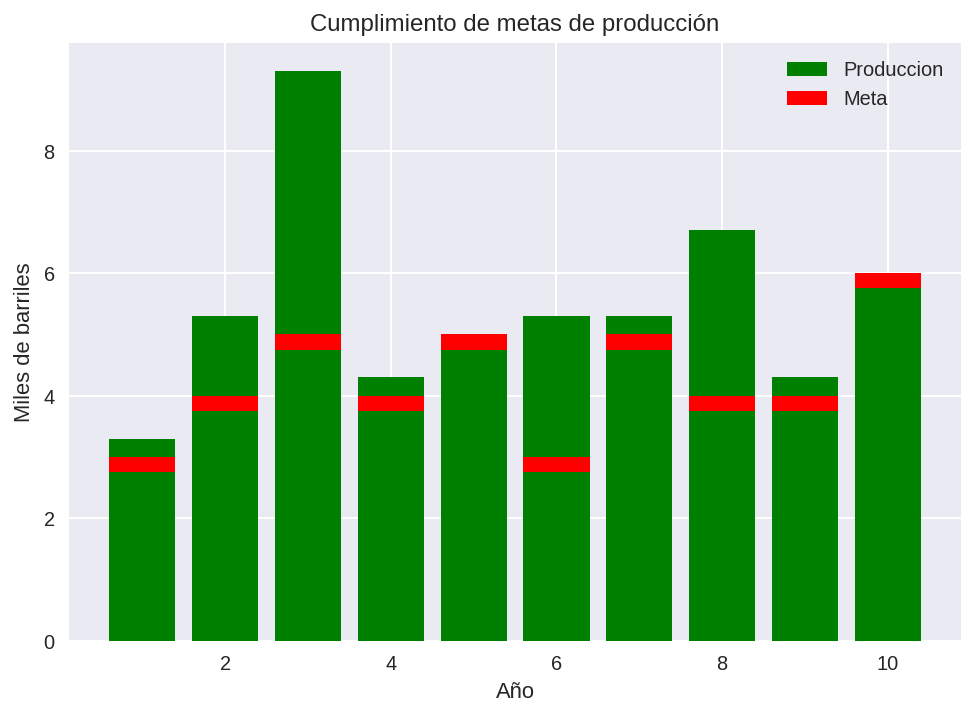

In [64]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'  # Configurando resoluci√≥n de las gr√°ficas
plt.style.use('seaborn')  # Configurando estilo de las gr√°ficas

pr = {t: round(sum((prodProm[i]*lp.value(x[i,t]) for i in Pozos)),1) for t in Tiempos}

plt.bar(Tiempos, pr.values(), color='green', label='Produccion')
plt.bar(Tiempos, metas.values(), color='red', label='Meta')
plt.bar(Tiempos, [val-0.25 for val in metas.values()], color='green')

plt.legend()
plt.xlabel('A√±o')
plt.ylabel('Miles de barriles')
plt.title('Cumplimiento de metas de producci√≥n')

plt.show()

### Uso de operarios

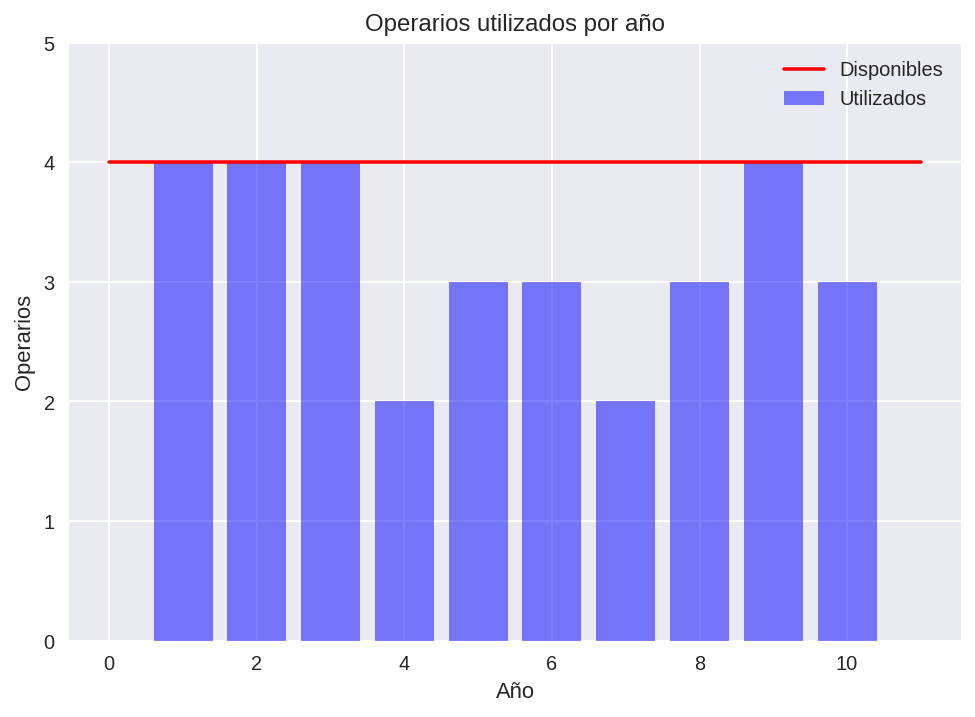

In [65]:
op = {t: sum(operarios[i]*lp.value(x[i,t]) for i in Pozos) for t in Tiempos}

plt.bar(Tiempos, op.values(), color='blue', alpha=0.5, label='Utilizados')
plt.plot(range(0,12), [maxOperarios]*(len(Tiempos)+2), color='red', label='Disponibles')

plt.legend()
plt.ylim(0,5)
plt.xlabel('A√±o')
plt.ylabel('Operarios')
plt.title('Operarios utilizados por a√±o')

plt.show()

### Uso de generadores

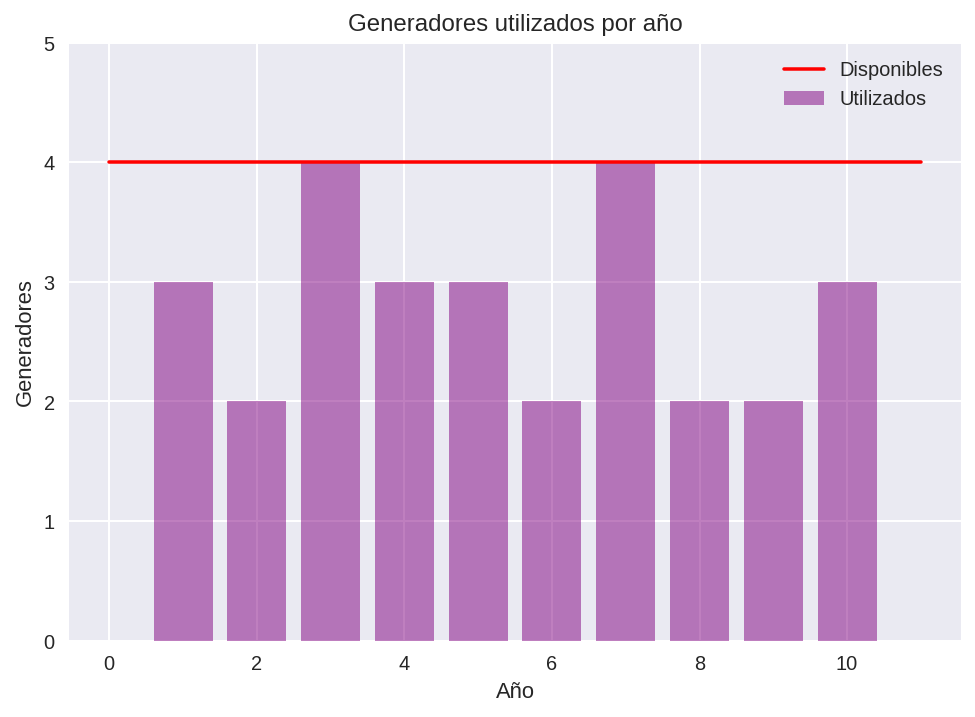

In [66]:
plt.bar(Tiempos, gen.values(), color='purple', alpha=0.5, label='Utilizados')
plt.plot(range(0,12), [maxGeneradores]*(len(Tiempos)+2), color='red', label='Disponibles')

plt.legend()
plt.ylim(0,5)
plt.xlabel('A√±o')
plt.ylabel('Generadores')
plt.title('Generadores utilizados por a√±o')

plt.show()

## Opcional (0 puntos)

*Una vez est√© listo el modelo, puedes cambiar los valores de los par√°metros de la pr√≥xima celda para verificar como cambian las soluciones y la funci√≥n objetivo. Para esto debes correr nuevamente las celdas que crean el modelo desde el principio*

In [67]:
# Parametros modificables

# Presupuesto m√°ximo
presupuesto = 100

# M√°ximo n√∫mero de proyectos a realizar - restricci√≥n ambiental
maxProyectos = 12  

# M√°ximo n√∫mero de operarios por a√±o
maxOperarios = 4   

# M√°ximo n√∫mero de generadores por a√±o
maxGeneradores = 4 

### Fin del laboratorio
---
Cuando hayas finalizado las preguntas, debes presionar el bot√≥n "Enviar tarea" en la parte superior.

Despu√©s de enviar el laboratorio, debes esperar algunos minutos para que se cargue la nota en Coursera.
¬°Muchos √©xitos!